# **📌 Objective**
**The goal of this project is to predict whether a patient has diabetes based on diagnostic measurements. We use the Pima Indians Diabetes Dataset, which is a binary classification problem with 8 medical predictor variables.**

# **📂 1. Dataset Information**

**Source**: https://www.kaggle.com/datasets/vaibhavgovindwar/pima-indian-diabetes

* Target Variable: Outcome (1 = diabetic, 0 = non-diabetic)

**Feature Variables:**


1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age



# ⚙️ 2. Import Libraries

# 🧹 3. Load Data


In [1]:
# import all libraries

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import joblib

# load the dataset

data = "/kaggle/input/pima-indian-diabetes/Pima indians diabetes dataset.csv"
cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(data, header=0, names=cols)
df.head(10)

2025-05-14 13:13:48.488456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747228428.794073      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747228428.877812      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1
5,5,116,74.0,27,102.5,25.6,0.201,30,0
6,3,78,50.0,32,88.0,31.0,0.248,26,1
7,10,115,70.0,27,102.5,35.3,0.134,29,0
8,2,197,70.0,45,270.0,30.5,0.158,53,1
9,8,125,96.0,32,169.5,34.3,0.232,54,1


In [2]:
# Split features and target
X = df.drop("Outcome", axis=1).values                    # All columns except 'Outcome' are features
Y = df["Outcome"].values                                 # Binary target: 0 or 1
 
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [3]:
# Save scaler
joblib.dump(scaler, "scaler.save")

['scaler.save']

# 🏗️ 4. Build the Neural Network

In [4]:
# Build a binary classification model
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=[X.shape[1]]))  # Input layer
model.add(layers.Dense(8, activation='relu'))                             # Hidden layer
model.add(layers.Dense(1, activation='sigmoid'))                          # Output layer

# Show model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 13:14:05.372015: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

# 🛠️ 5. Compile and Train the Model

In [5]:
# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, Y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    callbacks=[early_stop], 
                    verbose=0)

In [6]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

loss, acc = model.evaluate(X_train, Y_train, verbose=0)
print(f"Train Accuracy: {acc:.2f}")

Test Accuracy: 0.89
Train Accuracy: 0.86


# 📈 6. Plot Training and Validation Metrics

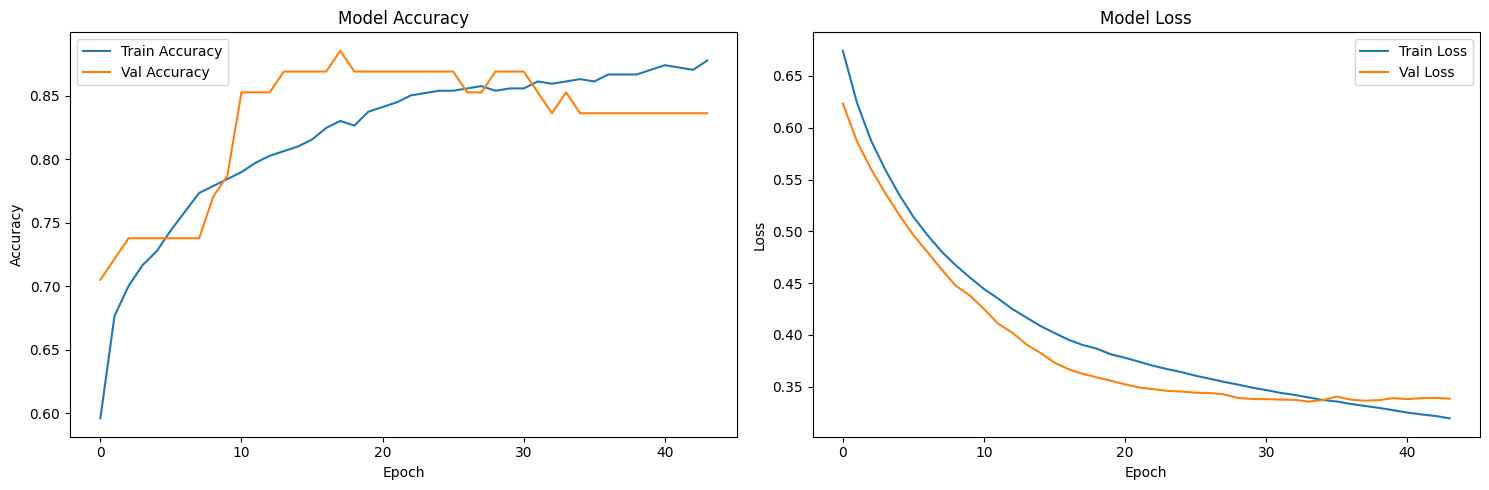

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 7. Save the Trained Model

In [8]:
model.save("diabetes_model.h5")

# ✅ Summary



1. **A neural network was trained using TensorFlow/Keras on medical data.**
2. **We achieved good accuracy with early stopping to avoid overfitting.**
3. **The model can now be saved and reused for predictions on new patient data.**

